# Assignment 1

NOTE-1: ALL COMPUTATIONS FOR QUESTION NUMBERS 1 to 13 NEED TO BE
OBTAINED FROM GOOGLE COLAB ONLY. Answers from other software (like Excel, PyCharm, Jupyter Notebook, etc.) may differ from the provided answers. Hence, such different answers will not be awarded marks, given the assignment is auto-graded.
NOTE-2: For ALL QUESTIONS in this assignment, input your answers rounded to 4 decimal
places. For example, if your answer is “1.234567” input the answer as “1.2435”
A car maker is exploring the distribution of defects in the assembly line. Data on defective
cars produced (a sample of 120 defective cars) on the assembly line are presented in the file
titled (GOF_24t2_3.xlsx). The file contains one column - obs. The obs indicates the number of scratches found in a produced car. You are hired as the business analyst to assist the car maker in answering the following
questions (Question Numbers 1 to 7).

## Import Libraries and Load files

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import poisson, chisquare, chi2_contingency

In [59]:
df_excel = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')
df_csv = pd.read_csv('/content/iitm_onlineDegree.csv')

In [60]:
df_excel.head()

,obs
0,4
1,3
2,8
3,7
4,4


In [61]:
df_csv.head()

,Gender,Preference
0,Female,Business
1,Female,Programming
2,Male,Business
3,Female,Statistics
4,Female,Programming


## Questions

### Question 1

Based on the given sample data, the column “obs” can be assumed to have a __

In [62]:
obs_values = df_excel['obs']
is_discrete = all(obs_values == obs_values.astype(int))
if is_discrete:
    print("The 'obs' values are discrete.")
else:
    print("The 'obs' values are continuous.")

The 'obs' values are discrete.


### Question 2


Given the sample data, the expected number of scratches on a car produced on the assembly line iS _____

In [63]:
expected_scratches = obs_values.mean()
print(f"The expected number of scratches on a car produced on the assembly line is {expected_scratches:.3f}.")

The expected number of scratches on a car produced on the assembly line is 3.842.


### Question 3

Based on the descriptive statistics (and visualization) of the sample data, the total scratch can be assumed to have a ___

Mean: 3.841666666666667
Median: 3.0
Mode: 3
None of the above


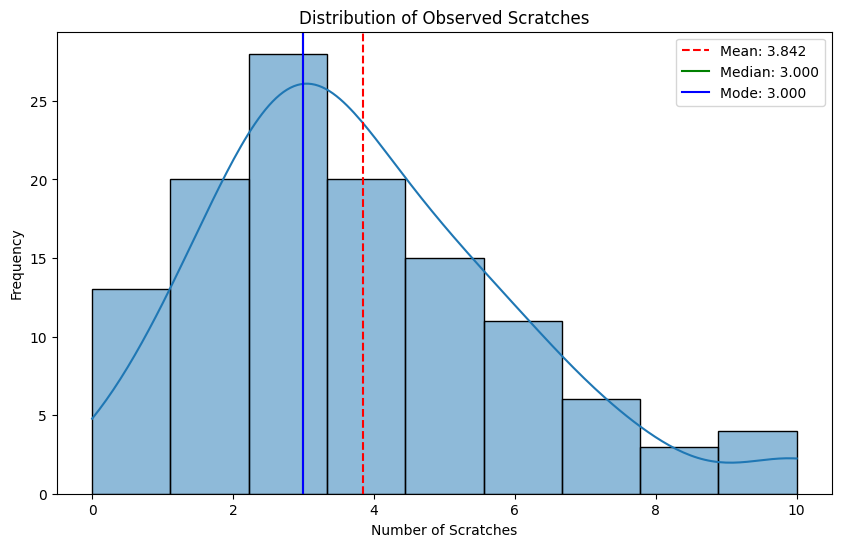

In [64]:
mean_val = obs_values.mean()
median_val = obs_values.median()
mode_val = obs_values.mode()[0]

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

if mean_val > median_val > mode_val:
    skewness = "Right skewed distribution as the mean > median > mode"
elif mode_val > median_val > mean_val:
    skewness = "Left skewed distribution as the mode > median > mean"
elif mode_val > mean_val > median_val:
    skewness = "Right skewed distribution as the mode > mean > median"
elif mean_val > mode_val > median_val:
    skewness = "Left skewed distribution as the mean > mode > median"
elif mean_val < median_val < mode_val:
    skewness = "Left skewed distribution as the mean < median < mode"
elif mode_val < median_val < mean_val:
    skewness = "Right skewed distribution as the mode < median < mean"
else:
    skewness = "None of the above"

print(skewness)


plt.figure(figsize=(10, 6))
sns.histplot(obs_values, kde=True)
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.3f}')
plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.3f}')
plt.axvline(mode_val, color='b', linestyle='-', label=f'Mode: {mode_val:.3f}')
plt.legend()
plt.title('Distribution of Observed Scratches')
plt.xlabel('Number of Scratches')
plt.ylabel('Frequency')
plt.show()


### Question 4

If you perform a chi-square goodness of fit test for the “obs” column, what is the probability of observing exactly 3 defects?

Hint-1: Use the descriptive statistics to identify a possible distribution

Hint-2: Determine the chi-square test statistic without adding any new bins. Modifying
an existing bin is allowed


In [65]:
lambda_poisson = obs_values.mean()
observed_freq = obs_values.value_counts().sort_index()
total_count = len(obs_values)
expected_freq = [poisson.pmf(k, lambda_poisson) * total_count for k in observed_freq.index]
expected_freq = np.array(expected_freq)
expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())
chi_square_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)
prob_3_defects = poisson.pmf(3, lambda_poisson)

# print(f"Mean (lambda) of the 'obs' column: {lambda_poisson}")
# print(f"Observed frequencies:\n{observed_freq}")
# print(f"Expected frequencies:\n{np.round(expected_freq, 2)}")
# print(f"Chi-square statistic: {chi_square_stat:.2f}")
# print(f"P-value: {p_value:.2f}")
print(f"Probability of observing exactly 3 defects: {prob_3_defects:.4f}")

Probability of observing exactly 3 defects: 0.2028


### Question 5

If you perform a chi-square goodness of fit test for the “obs” column, what is the value of the computed test statistic?

 Hint-1: Use the descriptive statistics to identify a possible distribution

 Hint-2: Determine the chi-square test statistic without adding any new bins. Modifying an existing bin is allowed

In [66]:
print(f"Chi-square statistic: {chi_square_stat:.3f}")

Chi-square statistic: 26.028


### Question 6

f you perform a chi-square goodness of fit test for the “obs” column, what is the p-value for the test?

Hint-1: Use the descriptive statistics to identify a possible distribution

Hint-2: Determine the chi-square test statistic without adding any new bins. Modifying an existing bin is allowed

 Hint-3: Assume suitable ddof for the distribution

In [67]:
print(f"P-value: {p_value:.3f}")

P-value: 0.002


### Question 7

How many degrees of freedom are present in the chi-square goodness of test to determine the distribution for the “Number of Scratches” column?

In [68]:
num_categories = obs_values.nunique()
num_parameters = 1
ddof = num_categories - num_parameters - 1

# print(f"Number of categories: {num_categories}")
print(f"Degrees of freedom: {ddof}")

Degrees of freedom: 8


### Question 8

Use the data (iitm_onlineDegree.csv) for analysing the following case. The data of the preferred subject of choice was collected from IITM online degree students between Male and Female students. Using the data provided, answer the following questions:


What is the degree of freedom?

In [69]:
# print(df_csv.head())
# print(df_csv.columns)

In [70]:
contingency_table = pd.crosstab(df_csv['Gender'], df_csv['Preference'])
num_rows = contingency_table.shape[0]
num_columns = contingency_table.shape[1]
ddof = (num_rows - 1) * (num_columns - 1)

# print(f"Number of rows: {num_rows}")
# print(f"Number of columns: {num_columns}")
print(f"Degrees of freedom: {ddof}")

Degrees of freedom: 2


### Question 9

What is the expected value of Female in Business subjects?

In [71]:
print("Contingency Table:\n", contingency_table)

Contingency Table:
 Preference  Business  Programming  Statistics
Gender                                       
Female           175           58         200
Male             139           36         124


In [72]:
row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.values.sum()
count_female_business = contingency_table.loc['Female', 'Business']
expected_freq_female_business = (row_totals['Female'] * column_totals['Business']) / grand_total

# print(f"Count of Female students in Business subjects: {count_female_business}")
print(f"Expected frequency of Female students in Business subjects: {expected_freq_female_business:.3f}")

Expected frequency of Female students in Business subjects: 185.740


### Question 10


What is the calculated value of Chi square statistic?
Hint: round-off to two decimals

In [73]:
# Perform the chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table, correction=False)

# Print results
# print("Contingency Table:\n", contingency_table)
print(f"Chi-square Statistic: {chi2_stat:.3f}")
# print(f"P-value: {p_value:.4f}")
# print(f"Degrees of Freedom: {dof}")
# print(f"Expected Frequencies:\n{expected_freq}")

Chi-square Statistic: 2.663


### Question 11

What is the tabulated value of Chi square statistic?
Hint: round-off to two decimals

In [74]:
ddof = 2
alpha = 0.05
tabulated_value = stats.chi2.ppf(1 - alpha, df=ddof)

# print(f"Degrees of Freedom: {ddof}")
# print(f"Significance Level: {alpha}")
print(f"Tabulated Chi-square Value: {tabulated_value:.3f}")

Tabulated Chi-square Value: 5.991


### Question 12

What is the p-value?

In [75]:
print(f"P-value: {p_value:.4f}")

P-value: 0.2641


### Question 13

At a significance level of 0.05, what can we conclude?

[A] Reject the null hypothesis and conclude that the categorical variables are independent

[B] Reject the null hypothesis and conclude that the categorical variables are not independent

[C] Fail to reject the null hypothesis and conclude that the categorical variables are independent

[D] Fail to reject the null hypothesis and conclude that the categorical variables are not independent

In [76]:
tabulated_value = stats.chi2.ppf(1 - alpha, df=ddof)
print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"Tabulated Chi-square Value: {tabulated_value:.2f}")

if chi2_stat > tabulated_value:
    print("Reject the null hypothesis and conclude that the categorical variables are not independent.")
else:
    print("Fail to reject the null hypothesis and conclude that the categorical variables are independent.")

Chi-square Statistic: 2.66
Tabulated Chi-square Value: 5.99
Fail to reject the null hypothesis and conclude that the categorical variables are independent.


# Assigment 2

## Import Files and Load data


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
data_transform = pd.read_excel('data_transform.xlsx')

In [79]:
model = smf.ols('Sales ~ Price', data=data_transform).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     53.34
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.52e-09
Time:                        13:33:21   Log-Likelihood:                -219.72
No. Observations:                  50   AIC:                             443.4
Df Residuals:                      48   BIC:                             447.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.9927      7.209     11.095      0.0

## Questions

1) Instructions to be followed:

a. Use only google collab for modelling

b. Do not do any feature engineering on the datasets provided

c. Use the hints provided

Using the dataset data_transform.xlsx analyze the sales at retail outlets for different prices. Fit a
Simple Linear regression model to this dataset using the concept of the Demand Response Curve and
answer questions (1) to (4).
Hint: smf.ols from statsmodels.formula.api

### Question 1

What is the r-square value (round off to two decimals)

In [80]:
print('The R-squared value from your model summary is 0.526')

The R-squared value from your model summary is 0.526


### Question 2


Is the model significant?

In [81]:
print('Yes')

Yes


#### Why

Yes, the model is significant. Here’s why:

1. **F-statistic and p-value**: The F-statistic for the model is 53.34, and the associated p-value is \(2.52 \times 10^{-9}\). This p-value is extremely small (well below the conventional alpha level of 0.05), indicating that the model as a whole is statistically significant. This suggests that the predictor variable (`Price`) has a significant impact on the dependent variable (`Sales`).

2. **t-values and p-values for coefficients**: The coefficients for both the `Intercept` (t-value of 11.095, p-value = 0.000) and `Price` (t-value of -7.304, p-value = 0.000) are statistically significant. The p-values are well below 0.05, indicating that these coefficients are significantly different from zero.

In summary, the very low p-values associated with both the overall model and the individual coefficients suggest that the model is statistically significant and that the predictor variable (`Price`) significantly affects the outcome (`Sales`).

### Question 3


What is the value of the intercept?

In [82]:
print('The value of the intercept from your model summary is 79.9927')

The value of the intercept from your model summary is 79.9927


### Question 4


What is the value of the slope?

In [83]:
print('The value of the slope (coefficient for Price) from your model summary is -21.2052.')

The value of the slope (coefficient for Price) from your model summary is -21.2052.


### Question 5

Use natural log transformation and refit the model using the transformed dataset answer questions (5) to (8)
Hint: Use np.log


What is the value of R-square on the transformed dataset

In [84]:
data_transform['log_Sales'] = np.log(data_transform['Sales'])
data_transform['log_Price'] = np.log(data_transform['Price'])
model_log = smf.ols('log_Sales ~ log_Price', data=data_transform).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Sales   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.74e-16
Time:                        13:33:21   Log-Likelihood:                -22.079
No. Observations:                  50   AIC:                             48.16
Df Residuals:                      48   BIC:                             51.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1333      0.097     42.560      0.0

In [85]:
print('The value of R2 on the transformed dataset is 0.752')

The value of R2 on the transformed dataset is 0.752


### Question 6

Is the model significant?

In [86]:
print('Yes')

Yes


#### Why?

Yes, the model is significant. Here’s why:

1. **F-statistic and p-value**:
   - The F-statistic for the model is 145.6, and the associated p-value is \(3.84 \times 10^{-16}\). This very small p-value indicates that the overall model is statistically significant. It suggests that `Price` is a significant predictor of `log(Sales)`.

2. **t-values and p-values for coefficients**:
   - The intercept has a t-value of 33.417 and a p-value of 0.000, which indicates it is significantly different from zero.
   - The coefficient for `Price` has a t-value of -12.065 and a p-value of 0.000, which indicates that the slope is significantly different from zero.

The very low p-values associated with the F-statistic and the coefficients suggest that the model, as well as the predictor variable (`Price`), are statistically significant.

### Question 7


What is the value of the intercept?

In [87]:
print('The value of the intercept from the log-transformed model is 4.7022')

The value of the intercept from the log-transformed model is 4.7022


### Question 8

What is the value of the slope?

In [88]:
print('The value of the slope (coefficient for `Price`) from the log-transformed model is -0.6837')

The value of the slope (coefficient for `Price`) from the log-transformed model is -0.6837


### Question 9

Pandya Motors, a passenger car manufacturer, wants to predict the profit for its cars based on
the expenditure spent on areas like safety features, tech features, and marketing. Every car
has multiple variants like the base model, middle variant, top model, automatic gearbox, etc.

Based on the data provided, build a linear regression model and predict the profit. Use the
instructions provided below.

i. You are provided with two excel files: X.xlsx and y.xlsx, where X is the feature matrix,
and y is the target variable.

ii. Use only google collab for doing this assignment as we have created the scoring scheme
based on the results obtained from Google Collab.

iii. Do not do any kind of feature engineering as the data is already feature-engineered and
ready to be used for building the regression model.

iv. Use train_test_split from sklearn.model_selection and keep the test_size = 0.2,
random_state = 0

v. Next, use LinearRegression from sklearn.linear_model and build the regression model

vi. As usual, fit the model on X_train and y_train

vii. Then predict on X_test

In [89]:
X = pd.read_excel('X.xlsx')
y = pd.read_excel('y.xlsx')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

What is the r-sqaure of the model?

In [92]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

R-squared: 0.9347068473282426


### Question 10

What is the value of the intercept?

In [93]:
intercept = model.intercept_
print(f"Intercept: {intercept}")

Intercept: [69744.98712385]


### Question 11


If
X
1
​
  = 1315.46,
X
2
​
 = 115816.21,
X
3
​
  = 297114.46,
X
4
​
  = 1,
X
5 = 0, then predict the profit from your linear regression model.


In [94]:
X.columns, y.columns

(Index(['Safety Features', 'Tech Features', 'Marketing Spend',
        'Premium Hatchback', 'SUV'],
       dtype='object'),
 Index(['Profit'], dtype='object'))

In [95]:
input_data = pd.DataFrame({
    'Safety Features': [1315.46],
    'Tech Features': [115816.21],
    'Marketing Spend': [297114.46],
    'Premium Hatchback': [1],
    'SUV': [0]
})
predicted_profit = model.predict(input_data)
print(f"Predicted Profit: {predicted_profit[0]}")

Predicted Profit: [84489.1056363]


# Assignment 3

**Executive Summary**
Heart disease is easier to treat when it is detected in the early stages. Statistical techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.

**Problem Statement:**
Analyze the heart disease dataset to explore the logistic regression algorithm and build a model to predict the disease.

**Dataset Information:**
Each attribute in the heart disease dataset is a medical risk factor.

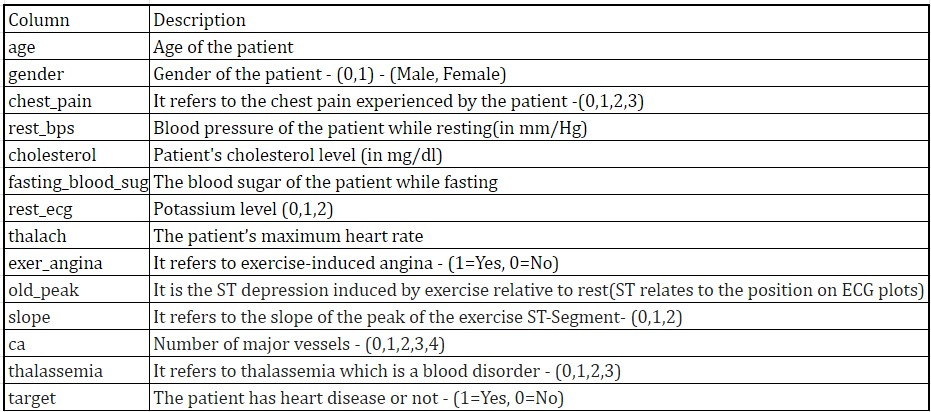

**Learning Outcome:**
The students should be able to predict heart disease from medical records with the help of a classification model.
 You are provided with four datasets:

1. X_train.xlsx

2. X_test.xlsx

3. Y_train.xlsx

4. Y_test.xlsx  

You will be working on a classification problem where the target variable says whether the customer has a heart disease (indicated by 1) or not (indicated by 0).

Please follow the instructions given below to complete your assignment.

Use only Google Collab for doing this assignment.

Do not try feature engineering on the dataset as it will modify the answers

Do not consider this as an imbalanced dataset

Just Load the X_train.xlsx, Y_train. xlsx

Separtely load the X_test. xlsx and Y_test. xlsx

Run LogisticRegression() with random state = 17, and use max_iterations = 1000.

Fit the model on X_train and y_train

Predict on the X_train using the Logistic Regression model and store the predictions in y_pred_train

Predict on the X_test using the Logistic Regression model and store the predictions in y_pred_test

Print the classification report for training and test data predictions

Create the confusion matrix for test data

Round-off all answers to 2 decimal places

In [96]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score


In [97]:
X_train = pd.read_excel('X_train.xlsx')
y_train = pd.read_excel('Y_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_test = pd.read_excel('Y_test.xlsx')

In [98]:
X_train.drop(['Unnamed: 0'],axis=1,  inplace=True)
X_test.drop(['Unnamed: 0'],axis=1, inplace=True)
y_train.drop(['Unnamed: 0'],axis=1, inplace=True)
y_test.drop(['Unnamed: 0'],axis=1, inplace=True)

In [99]:
y_train.columns

Index(['target'], dtype='object')

In [100]:
X_test.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,56,0,0,134,409,0,0,150,1,1.9,1,2,3
1,58,1,2,112,230,0,0,165,0,2.5,1,1,3
2,64,1,2,125,309,0,1,131,1,1.8,1,0,3
3,47,1,0,112,204,0,1,143,0,0.1,2,0,2
4,50,1,0,150,243,0,0,128,0,2.6,1,0,3


### Question 1

How many observations are available in the training data? Hint: Enter your answer as an integer.

In [101]:
# Check the number of observations (rows) in X_train and y_train
num_observations_X_train = X_train.shape[0]
num_observations_y_train = y_train.shape[0]

print(f"Number of observations in X_train: {num_observations_X_train}")
print(f"Number of observations in y_train: {num_observations_y_train}")

Number of observations in X_train: 212
Number of observations in y_train: 212


### Question 2

How many observations are available in the test data?

In [102]:
# Check the number of observations (rows) in X_test and y_test
num_observations_X_test = X_test.shape[0]
num_observations_y_test = y_test.shape[0]

print(f"Number of observations in X_test: {num_observations_X_test}")
print(f"Number of observations in y_test: {num_observations_y_test}")


Number of observations in X_test: 91
Number of observations in y_test: 91


### Question 3

What is the proportion of patients who have heart disease in the training dataset?
Hint: Mention your answer in terms of percentage. If your answer is 70.51%, enter 70.51

In [103]:
# Calculate the proportion of patients with heart disease (target = 1)
num_heart_disease = (y_train['target'] == 1).sum()  # Count patients with heart disease
total_patients = y_train.shape[0]  # Total number of patients

# Calculate the percentage
proportion_heart_disease = (num_heart_disease / total_patients) * 100

# Print the result rounded to 2 decimal places
print(f"Proportion of patients with heart disease: {proportion_heart_disease:.2f}%")

Proportion of patients with heart disease: 58.49%


### Question 4

What is the proportion of patients who have heart disease in the test dataset?
Hint:Mention your answer in terms of percentage. If your answer is 70.51%, enter 70.51

In [104]:
# Calculate the proportion of patients with heart disease (target = 1) in the test dataset
num_heart_disease_test = (y_test['target'] == 1).sum()  # Count patients with heart disease
total_patients_test = y_test.shape[0]  # Total number of patients

# Calculate the percentage
proportion_heart_disease_test = (num_heart_disease_test / total_patients_test) * 100

# Print the result rounded to 2 decimal places
print(f"Proportion of patients with heart disease in the test dataset: {proportion_heart_disease_test:.2f}%")

Proportion of patients with heart disease in the test dataset: 45.05%


### Question 5

What is the proportion of patients who do not have heart disease in the test dataset?
Hint: Mention your answer in terms of percentage. If your answer is 70.51%, enter 70.51


In [105]:
# Calculate the proportion of patients without heart disease (target = 0) in the test dataset
num_no_heart_disease_test = (y_test['target'] == 0).sum()  # Count patients without heart disease
total_patients_test = y_test.shape[0]  # Total number of patients

# Calculate the percentage
proportion_no_heart_disease_test = (num_no_heart_disease_test / total_patients_test) * 100

# Print the result rounded to 2 decimal places
print(f"Proportion of patients without heart disease in the test dataset: {proportion_no_heart_disease_test:.2f}%")

Proportion of patients without heart disease in the test dataset: 54.95%


### Question 6

What is the proportion of patients who do not have heart disease in the training dataset?
Hint: Mention your answer in terms of percentage. If your answer is 70.51%, enter 70.51

In [106]:
# Calculate the proportion of patients without heart disease (target = 0) in the training dataset
num_no_heart_disease_train = (y_train['target'] == 0).sum()  # Count patients without heart disease
total_patients_train = y_train.shape[0]  # Total number of patients

# Calculate the percentage
proportion_no_heart_disease_train = (num_no_heart_disease_train / total_patients_train) * 100

# Print the result rounded to 2 decimal places
print(f"Proportion of patients without heart disease in the training dataset: {proportion_no_heart_disease_train:.2f}%")

Proportion of patients without heart disease in the training dataset: 41.51%


### Question 7

Fit the model on the train data (use LogisticRegression from sklearn.linear_model and
random state=17) and make predictions on the train data, and answer questions (7 to 9).
What is the training accuracy? If your answer is 70.51%, enter 70.5.

Hint: Compare the predictions of Y_train and Y_pred_train. If your answer is 70.51%,
enter 70.51

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract the target column from y_train if it's a DataFrame
y_train = y_train['target']

# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=17, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train) * 100

# Print the training accuracy rounded to 2 decimal places
print(f"Training Accuracy: {training_accuracy:.2f}%")


Training Accuracy: 85.38%


### Question 8

What is the training data precision of your model if the aim is to find patients who will
not have heart disease?
 Hint: Compare the predictions of Y_train and Y_pred_train. Mention your answer in terms of percentage. If your answer is 70.51%, enter 70.51

In [108]:
# Calculate the precision for the class where the target is 0
precision_no_heart_disease = precision_score(y_train, y_pred_train, pos_label=0) * 100

# Print the precision rounded to 2 decimal places
print(f"Training Data Precision for patients without heart disease: {precision_no_heart_disease:.2f}%")


Training Data Precision for patients without heart disease: 86.08%


### Question 9

What is the training data recall of your model if the aim is to find patients who will have heart disease? Hint: enter your answer in terms of percentage. If your answer is 70.51%, enter 70.51


In [109]:
# Calculate the recall for the class where the target is 1
recall_heart_disease = recall_score(y_train, y_pred_train, pos_label=1) * 100

# Print the recall rounded to 2 decimal places
print(f"Training Data Recall for patients with heart disease: {recall_heart_disease:.2f}%")


Training Data Recall for patients with heart disease: 91.13%


### Question 10

After training your model on the train data, make predictions on the test data, and answer
questions (10) to (14). From the confusion matrix, identify the number of predictions that
have a type 1 error (false positive).
Hint: Use confusion_matrix(Y_test, Y_pred_test).ravel() and enter your answer as an integer.

In [110]:
# Extract the target column from y_test if it's a DataFrame
y_test = y_test['target']

# Make predictions on the test data
y_pred_test = model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
# print(conf_matrix)
# Extract the number of false positives (Type 1 errors)
# The confusion matrix is in the form:
# [[TN, FP],
#  [FN, TP]]
# where FP (False Positives) is at index [0, 1]
false_positives = conf_matrix.ravel()[1]

# Print the number of false positives
print(f"Number of Type 1 errors (false positives): {false_positives}")

Number of Type 1 errors (false positives): 17


### Question 11

In the test data confusion matrix, identify the number of predictions that have a type 2
error (false negative).
Hint: Use confusion_matrix(Y_test, Y_pred_test).ravel() and enter your answer as an integer.

In [111]:
# where FN (False Negatives) is at index [1, 0]
false_negatives = conf_matrix.ravel()[2]

# Print the number of false negatives
print(f"Number of Type 2 errors (false negatives): {false_negatives}")

Number of Type 2 errors (false negatives): 4


### Question 12

What is the accuracy of the model in the test data? Mention your answer in terms of
percentage and round off the answers to two decimals. If your answer is 70.51%, enter
70.51

In [112]:
# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

# Print the accuracy rounded to 2 decimal places
print(f"Test Data Accuracy: {test_accuracy:.2f}%")


Test Data Accuracy: 76.92%


### Question 13

What is the precision of your model in the test data if the aim is to find patients who will
have heart disease? Hint: Mention your answer in terms of percentage and round off the
answers to two decimals. If your answer is 70.51%, enter 70.51

In [113]:
# Calculate the precision for the class where the target is 1
precision_heart_disease = precision_score(y_test, y_pred_test, pos_label=1) * 100

# Print the precision rounded to 2 decimal places
print(f"Test Data Precision for patients with heart disease: {precision_heart_disease:.2f}%")

Test Data Precision for patients with heart disease: 68.52%


### Question 14


What is the recall of your model in the test data if the aim is to find patients who will have heart disease? Mention your answer in terms of percentage and round off the answers to two decimals. If your answer is 70.51%, enter 70.51

In [114]:
# Calculate the recall for the class where the target is 1
recall_heart_disease = recall_score(y_test, y_pred_test, pos_label=1) * 100

# Print the recall rounded to 2 decimal places
print(f"Test Data Recall for patients with heart disease: {recall_heart_disease:.2f}%")

Test Data Recall for patients with heart disease: 90.24%


### Question 15

Has the precision for customers having a heart disease increased or decreased when the model is tested on the testing data set as compared to the results obtained from the training data set?

[A] Training Precision > Test Precision

[B] Training Precision < Test Precision

[C] Training Precision = Test Precision

[D] None of the above

In [115]:
# Calculate precision on the training data
y_pred_train = model.predict(X_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=1) * 100

# Calculate precision on the test data
y_pred_test = model.predict(X_test)
precision_test = precision_score(y_test, y_pred_test, pos_label=1) * 100

# Print the precision values
print(f"Training Precision: {precision_train:.2f}%")
print(f"Test Precision: {precision_test:.2f}%")

# Determine if precision has increased or decreased
if precision_train > precision_test:
    print("Training Precision > Test Precision")
elif precision_train < precision_test:
    print("Training Precision < Test Precision")
else:
    print("Training Precision = Test Precision")

Training Precision: 84.96%
Test Precision: 68.52%
Training Precision > Test Precision
